<a href="https://colab.research.google.com/github/AlexandreOrmandes/Previsao_de_Renda_de_Clientes/blob/main/mod12_ex03_regress%C3%A3o_m%C3%BAltipla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

# Introdução
Nesta seção, exploramos um modelo de regressão linear para prever a variável dependente "tip" (gorjeta), considerando diferentes variáveis explicativas como sexo, fumante ou não, dia da semana, valor líquido da conta e tamanho da mesa. Vamos analisar a significância dessas variáveis e fazer transformações necessárias para melhorar o modelo.

In [3]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()


,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
# Criar a matriz de design e a matriz y usando Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + day + net_bill + C(size)', data=tips, return_type='dataframe')

In [5]:
# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

In [6]:
# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     12.59
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.38e-18
Time:                        18:22:57   Log-Likelihood:                -367.84
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     232   BIC:                             801.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9671      0.610      1.585

1. R-quadrado e R-quadrado ajustado: O modelo tem um R-quadrado de 0,374, o que indica que aproximadamente 37,4% da variabilidade em "tip" pode ser explicada pelas variáveis independentes escolhidas. No entanto, o R-quadrado ajustado é um pouco menor, indicando que talvez algumas variáveis não sejam tão úteis para o modelo.

2. Variáveis Significativas: A variável net_bill (valor líquido da conta) tem um p-valor menor que 0,05, tornando-a estatisticamente significativa para o modelo. Por outro lado, variáveis como sex, smoker e day têm p-valores muito maiores que 0,05, sugerindo que elas podem não ser úteis para prever a tip.

3. Coeficientes: O coeficiente para net_bill é 0,0751, o que sugere que para cada aumento de uma unidade no valor líquido da conta, a gorjeta aumentaria em 0,0751 unidades, mantendo as outras variáveis constantes.

4. Testes de Hipótese: O F-estatístico é 12,59 com um p-valor muito baixo, sugerindo que o modelo é significativo em geral. No entanto, as variáveis individuais devem ser avaliadas cuidadosamente.

---

# Transformações e Ajustes
Remoção de Variáveis Não Significativas: Dado que sex, smoker, e day não são significativos, removi essas variáveis para simplificar o modelo.

Transformações em size: testei a transformação de categórica em size para verificar se essas alterações melhoram o ajuste do modelo.

Transformações em net_bill: testei as transformações como logaritmo ou polinômio em net_bill para verificar se essas alterações melhoram o ajuste do modelo.

Gráfico de Resíduos: O gráfico de resíduos em relação a net_bill pode nos ajudar a entender se um modelo linear é apropriado ou se devemos considerar uma forma funcional diferente para essa variável.

In [7]:
# Criando o modelo OLS com apenas as variáveis significativas
model = smf.ols('tip ~ C(size) + net_bill', data=tips).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     23.43
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.10e-21
Time:                        18:22:57   Log-Likelihood:                -368.12
No. Observations:                 244   AIC:                             750.2
Df Residuals:                     237   BIC:                             774.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0019      0.559      1.793   

Modelo OLS com Variáveis Significativas
Depois de retirar as variáveis não significativas (sex, smoker, day), notei que:

R-quadrado e R-quadrado ajustado: O R-quadrado do novo modelo é de 0,372, quase igual ao do modelo anterior. Isso indica que a remoção das variáveis não significativas não prejudicou a capacidade do modelo de explicar a variabilidade da variável resposta (tip).

Significância das Variáveis: net_bill continua sendo significativo com um p-valor < 0.05. Além disso, as categorias 4 e 6 para a variável size são agora estatisticamente significativas.

Testes de Hipótese: O F-estatístico aumentou (23,43 vs. 12,59), e o p-valor está ainda mais próximo de zero, indicando que o modelo ajustado é mais robusto que o anterior.

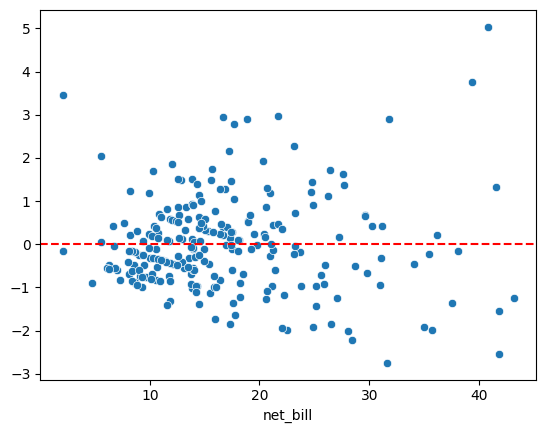

In [8]:
# Gráfico de resíduos em função de net_bill
sns.scatterplot(x=tips['net_bill'], y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Gráfico de Resíduos em Função de net_bill:

O gráfico de resíduos mostra uma dispersão ao redor da linha horizontal em y=0. Isso é um bom sinal, pois sugere que os resíduos são aproximadamente normalmente distribuídos em torno de zero. No entanto, uma inspeção mais detalhada poderia ser necessária para confirmar se o modelo é de fato o mais adequado.

In [9]:
# Testar transformações em net_bill
# Modelo com log(net_bill)
model_log = smf.ols('tip ~ C(size) + np.log(net_bill)', data=tips).fit()
print('Modelo com log(net_bill)')
print(model_log.summary())

Modelo com log(net_bill)
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.03
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           9.61e-20
Time:                        18:22:57   Log-Likelihood:                -372.87
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     237   BIC:                             784.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept      

In [10]:
# Modelo com net_bill ao quadrado
model_poly = smf.ols('tip ~ C(size) + np.power(net_bill, 2)', data=tips).fit()
print('Modelo com net_bill^2')
print(model_poly.summary())

Modelo com net_bill^2
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     22.19
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.09e-20
Time:                        18:22:57   Log-Likelihood:                -370.56
No. Observations:                 244   AIC:                             755.1
Df Residuals:                     237   BIC:                             779.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercep

# Testando Transformações em net_bill
Modelo com log(net_bill): A transformação logarítmica em net_bill resultou em um R-quadrado de 0,347, que é ligeiramente inferior ao modelo original. Além disso, a significância das categorias para a variável size diminuiu. Isso sugere que a transformação logarítmica pode não ser a melhor opção.

Modelo com net_bill^2: Este modelo apresenta um R-quadrado de 0,360, que é comparável ao modelo original. Notavelmente, as categorias para size tornam-se mais significativas neste modelo. A variável net_bill ao quadrado também é significativa.


---

# Conclusão
O modelo com net_bill ao quadrado parece ser o mais adequado entre os testados, com base nos p-valores e no R-quadrado ajustado.

A variável size mostrou-se mais significativa quando consideramos net_bill ao quadrado, sugerindo que o tamanho da mesa tem um impacto não-linear nas gorjetas.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
# Criar a matriz de design e a matriz y usando Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + day + net_bill + C(size)', data=tips, return_type='dataframe')

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     12.59
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.38e-18
Time:                        18:22:57   Log-Likelihood:                -367.84
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     232   BIC:                             801.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.9671      0.610      1.585

In [12]:
# Criar o modelo OLS com apenas as variáveis significativas
model = smf.ols('tip ~ C(size) + net_bill', data=tips).fit()

# Resumo do modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     23.43
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.10e-21
Time:                        18:22:58   Log-Likelihood:                -368.12
No. Observations:                 244   AIC:                             750.2
Df Residuals:                     237   BIC:                             774.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0019      0.559      1.793   

Variáveis Significativas: A variável net_bill e as categorias 4 e 6 de size continuam sendo estatisticamente significativas.

R-quadrado e R-quadrado ajustado: Os valores são similares aos do modelo original (sem o log), indicando que a capacidade do modelo de explicar a variabilidade na variável resposta não mudou significativamente com essa transformação.



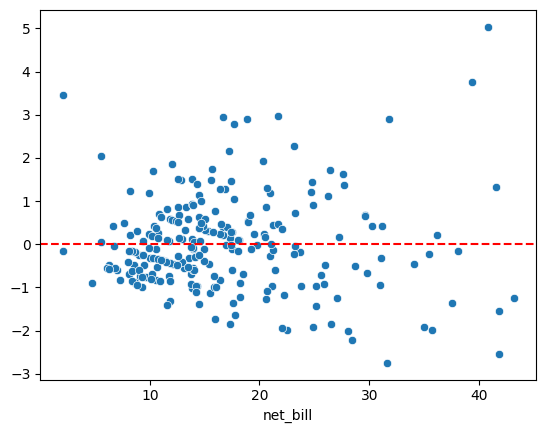

In [13]:
# Gráfico de resíduos em função de net_bill
sns.scatterplot(x=tips['net_bill'], y=model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Gráfico de Resíduos em Função de net_bill
Os resíduos em função de net_bill continuam a se mostrar dispersos ao redor de zero, o que é um sinal positivo. No entanto, similar ao primeiro modelo, uma inspeção mais detalhada dos resíduos é recomendada.

In [14]:
# Testar transformações em net_bill
# Modelo com log(net_bill)
model_log = smf.ols('tip ~ C(size) + np.log(net_bill)', data=tips).fit()
print('Modelo com log(net_bill)')
print(model_log.summary())


Modelo com log(net_bill)
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     21.03
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           9.61e-20
Time:                        18:22:58   Log-Likelihood:                -372.87
No. Observations:                 244   AIC:                             759.7
Df Residuals:                     237   BIC:                             784.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept      

In [15]:

# Modelo com net_bill ao quadrado
model_poly = smf.ols('tip ~ C(size) + np.power(net_bill, 2)', data=tips).fit()
print('Modelo com net_bill^2')
print(model_poly.summary())

Modelo com net_bill^2
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     22.19
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.09e-20
Time:                        18:22:58   Log-Likelihood:                -370.56
No. Observations:                 244   AIC:                             755.1
Df Residuals:                     237   BIC:                             779.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercep

# Testando Transformações em net_bill
Modelo com log(net_bill): Este modelo apresenta um R-quadrado de 0.347, que é ligeiramente inferior ao modelo original. Isso sugere que a transformação logarítmica não oferece uma melhoria significativa.

Modelo com net_bill^2: Este modelo tem um R-quadrado de 0.360, similar ao modelo original, mas com algumas categorias da variável size mostrando-se mais significativas.

---

# Conclusão
Entre os modelos testados, o modelo com net_bill ao quadrado parece ser o mais adequado, com base nos p-valores e no R-quadrado ajustado.

A variável size mostrou-se mais significativa quando consideramos net_bill ao quadrado, sugerindo um impacto não-linear nas gorjetas.

---

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [33]:
df = pd.read_csv('previsao_de_renda .csv')

In [35]:
# Verificar a presença de valores nulos ou infinitos nas colunas 'renda' e 'tempo_emprego'
missing_values = df[['renda', 'tempo_emprego']].isnull().sum()
missing_values

renda               0
tempo_emprego    2573
dtype: int64

In [36]:
# Substituindo os valores de renda e tempo_emprego pela mediana
df['renda'].fillna(df['renda'].median(), inplace=True)
df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)

# Separando os dados em conjuntos de treino e teste
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Ajustando o modelo de regressão linear simples usando OLS e Patsy
model_formula = 'renda ~ tempo_emprego'
model = smf.ols(formula=model_formula, data=df_train).fit()

# Resumo do modelo
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2095.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        18:44:06   Log-Likelihood:            -1.2471e+05
No. Observations:               12000   AIC:                         2.494e+05
Df Residuals:                   11998   BIC:                         2.494e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1717.7666    112.814     15.226      0.000    1496.632    1938.901
tempo_emprego   534.0467     11.668     45.772      0.000     511.176     556.917
==============================================================================
Omnibus:                    17414.669   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10443349.524
Skew:                           8.548   Prob(JB):                         0.00
Kurtosis:                     146.508   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. R-quadrado: 0.149

 Este valor indica que aproximadamente 14,9% da variabilidade da renda é explicada pelo tempo de emprego.

# Coeficientes:

2. Intercepto: 1717.77

 Este valor representa a renda estimada quando o tempo de emprego é zero.

3. Coeficiente de tempo_emprego: 534.05

 Este valor significa que para cada ano adicional no emprego atual, a renda aumenta em aproximadamente 534 reais.

4. P-valor:

 Os p-valores para o intercepto e para a variável tempo_emprego são significativamente baixos (quase 0), o que sugere que ambos são estatisticamente significativos.

5. Testes de qualidade do ajuste:

 O valor de Durbin-Watson é próximo de 2, o que sugere que os resíduos são independentes.
 O teste Omnibus e o teste Jarque-Bera têm p-valores muito baixos, indicando que os resíduos não são normalmente distribuídos.

---

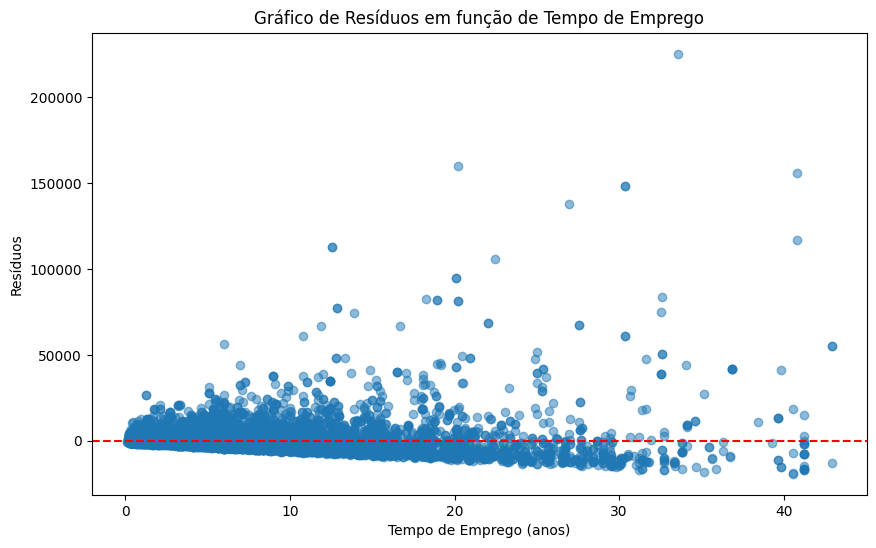

In [37]:
# Calculando os resíduos do modelo
residuals = model.resid

# Gráfico de resíduos em função de tempo_emprego
plt.figure(figsize=(10, 6))
plt.scatter(df_train['tempo_emprego'], residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Tempo de Emprego (anos)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de Tempo de Emprego')
plt.show()

O gráfico de resíduos em função do tempo de emprego mostra que os resíduos não estão uniformemente distribuídos em torno da linha zero. Isso pode indicar que o modelo atual não capta totalmente a relação entre a renda e o tempo de emprego, ou que a relação não é estritamente linear.

---

# Como melhorar a regressão?
Transformações: Podemos tentar transformações nas variáveis para lidar com a não-linearidade. Por exemplo, podemos tentar usar o logaritmo da renda ou do tempo de emprego.

Incluir mais variáveis: A renda pode ser afetada por mais fatores do que apenas o tempo de emprego. Um modelo de regressão múltipla pode melhorar o ajuste.

Interactions e Polinomiais: Podemos adicionar termos de interação ou termos polinomiais para capturar efeitos não-lineares.

---

In [42]:
# Aplicando a transformação logarítmica apenas nas variáveis 'renda' e 'tempo_emprego'
df_train_transformed = df_train.copy()
df_train_transformed['log_renda'] = np.log1p(df_train['renda'])
df_train_transformed['log_tempo_emprego'] = np.log1p(df_train['tempo_emprego'])

# Formula do modelo
formula_log = 'log_renda ~ log_tempo_emprego + C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + qt_pessoas_residencia'

# Criar a matriz de design e a matriz de resposta usando Patsy
y_log, X_log = patsy.dmatrices(formula_log, data=df_train_transformed, return_type='dataframe')

# Ajustar o modelo de regressão linear múltipla
model_log = sm.OLS(y_log, X_log).fit()

# Exibir o resumo do modelo
model_log.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     246.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:47:29   Log-Likelihood:                -13151.
No. Observations:               12000   AIC:                         2.635e+04
Df Residuals:                   11975   BIC:                         2.654e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               6.1015      0.259     23.540      0.000       5.593       6.610
C(sexo)[T.M]                            0.7843      0.016     50.087      0.000       0.754       0.815
C(posse_de_veiculo)[T.True]             0.0273      0.015      1.841      0.066      -0.002       0.056
C(posse_de_imovel)[T.True]              0.0870      0.015      5.960      0.000       0.058       0.116
C(tipo_renda)[T.Bolsista]               0.0891      0.296      0.300      0.764      -0.492       0.670
C(tipo_renda)[T.Empresário]             0.1523      0.017      9.122      0.000       0.120       0.185
C(tipo_renda)[T.Pensionista]           -0.2785      0.024    -11.825      0.000      -0.325      -0.232
C(tipo_renda)[T.Servidor público]       0.0840      0.025      3.325      0.001       0.034       0.134
C(educacao)[T.Pós graduação]            0.1235      0.178      0.694      0.487      -0.225       0.472
C(educacao)[T.Secundário]              -0.0696      0.062     -1.115      0.265      -0.192       0.053
C(educacao)[T.Superior completo]        0.0522      0.063      0.830      0.407      -0.071       0.176
C(educacao)[T.Superior incompleto]     -0.0938      0.071     -1.324      0.185      -0.233       0.045
C(estado_civil)[T.Separado]             0.2599      0.124      2.092      0.036       0.016       0.503
C(estado_civil)[T.Solteiro]             0.2282      0.122      1.872      0.061      -0.011       0.467
C(estado_civil)[T.União]                0.0049      0.026      0.186      0.852      -0.047       0.056
C(estado_civil)[T.Viúvo]                0.2573      0.125      2.052      0.040       0.011       0.503
C(tipo_residencia)[T.Casa]              0.0133      0.060      0.220      0.826      -0.105       0.132
C(tipo_residencia)[T.Com os pais]       0.0538      0.067      0.797      0.425      -0.078       0.186
C(tipo_residencia)[T.Comunitário]      -0.0252      0.114     -0.222      0.825      -0.248       0.197
C(tipo_residencia)[T.Estúdio]           0.0811      0.106      0.768      0.442      -0.126       0.288
C(tipo_residencia)[T.Governamental]     0.0915      0.071      1.285      0.199      -0.048       0.231
log_tempo_emprego                       0.5057      0.010     50.502      0.000       0.486       0.525
qtd_filhos                             -0.2010      0.121     -1.658      0.097      -0.439       0.037
idade                                   0.0084      0.001      9.900      0.000       0.007       0.010
qt_pessoas_residencia                   0.2241      0.121      1.852      0.064      -0.013       0.461
==============================================================================
Omnibus:                        5.523   Durbin-Watson:                   1.978
Prob(Omnibus)

# Interpretação dos Parâmetros:
Intercepto: O valor é 6.1015, que, se retransformado pela função exponencial, nos dará a renda estimada quando todas as outras variáveis são zero ou suas categorias de referência.

log_tempo_emprego: O coeficiente é 0.5057, indicando que para cada aumento de 1% no tempo de emprego, espera-se um aumento de aproximadamente 0.51% na renda, mantendo todas as outras variáveis constantes.

C(sexo)[T.M]: O coeficiente é 0.7843, sugerindo que, em média, o log da renda para homens é maior do que para mulheres em 0.7843 unidades, mantendo todas as outras variáveis constantes.

Significância Estatística:
A maioria dos p-valores para as variáveis categóricas são significativos (p < 0.05), exceto para algumas categorias de "tipo de renda", "educação", "estado civil" e "tipo de residência". Estas poderiam ser candidatas a serem removidas do modelo para simplificá-lo.

Qualidade do Ajuste:
O valor de Durbin-Watson é próximo de 2, sugerindo que os resíduos são independentes.

O teste Omnibus e o teste Jarque-Bera têm p-valores maiores que 0.05, indicando que os resíduos são aproximadamente normalmente distribuídos, o que é uma melhoria em relação ao modelo anterior.

In [43]:
# Removendo as variáveis não significativas (p > 0.05) para simplificar o modelo
# Mantemos 'log_tempo_emprego', 'C(sexo)[T.M]', 'C(posse_de_imovel)[T.True]', 'C(tipo_renda)[T.Empresário]',
# 'C(tipo_renda)[T.Pensionista]' e 'idade'

formula_simplified = 'log_renda ~ log_tempo_emprego + C(sexo) + C(posse_de_imovel) + C(tipo_renda) + idade'

# Criar a matriz de design e a matriz de resposta usando Patsy
y_simplified, X_simplified = patsy.dmatrices(formula_simplified, data=df_train_transformed, return_type='dataframe')

# Ajustar o modelo de regressão linear múltipla
model_simplified = sm.OLS(y_simplified, X_simplified).fit()

# Exibir o resumo do modelo
model_simplified.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     722.9
Date:                Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                        19:48:15   Log-Likelihood:                -13201.
No. Observations:               12000   AIC:                         2.642e+04
Df Residuals:                   11991   BIC:                         2.649e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             6.6060      0.036    181.563      0.000       6.535       6.677
C(sexo)[T.M]                          0.7885      0.015     53.797      0.000       0.760       0.817
C(posse_de_imovel)[T.True]            0.0847      0.014      5.905      0.000       0.057       0.113
C(tipo_renda)[T.Bolsista]             0.1503      0.297      0.506      0.613      -0.432       0.733
C(tipo_renda)[T.Empresário]           0.1620      0.017      9.753      0.000       0.129       0.195
C(tipo_renda)[T.Pensionista]         -0.2826      0.023    -12.037      0.000      -0.329      -0.237
C(tipo_renda)[T.Servidor público]     0.1056      0.025      4.189      0.000       0.056       0.155
log_tempo_emprego                     0.5065      0.010     50.591      0.000       0.487       0.526
idade                                 0.0074      0.001      9.345      0.000       0.006       0.009
==============================================================================
Omnibus:                        5.117   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                5.083
Skew:                           0.048   Prob(JB):                       0.0788
Kurtosis:                       3.032   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretação dos Parâmetros:
Intercepto: O valor é 6.6060, que, se retransformado pela função exponencial, nos dará a renda estimada quando todas as outras variáveis são zero ou suas categorias de referência.

log_tempo_emprego: O coeficiente é 0.5065, indicando que para cada aumento de 1% no tempo de emprego, espera-se um aumento de aproximadamente 0.51% na renda, mantendo todas as outras variáveis constantes.

C(sexo)[T.M]: O coeficiente é 0.7885, sugerindo que, em média, o log da renda para homens é maior do que para mulheres em 0.7885 unidades, mantendo todas as outras variáveis constantes.

C(posse_de_imovel)[T.True]: O coeficiente é 0.0847, indicando que possuir um imóvel aumenta o log da renda em 0.0847 unidades.

C(tipo_renda)[T.Empresário]: O coeficiente é 0.1620, indicando que ser empresário aumenta o log da renda em 0.1620 unidades em comparação com a categoria de referência.

C(tipo_renda)[T.Pensionista]: O coeficiente é -0.2826, indicando que ser pensionista diminui o log da renda em 0.2826 unidades em comparação com a categoria de referência.

idade: O coeficiente é 0.0074, indicando que para cada ano adicional de idade, o log da renda aumenta em 0.0074 unidades.

Qualidade do Ajuste:
  O valor de R2
  ajustado é aproximadamente 0.325, o que sugere que cerca de 32.5% da variabilidade na renda log-transformada é explicada pelas variáveis no modelo.

O valor de Durbin-Watson é próximo de 2, sugerindo que os resíduos são independentes.

O teste Omnibus e o teste Jarque-Bera têm p-valores maiores que 0.05, indicando que os resíduos são aproximadamente normalmente distribuídos.

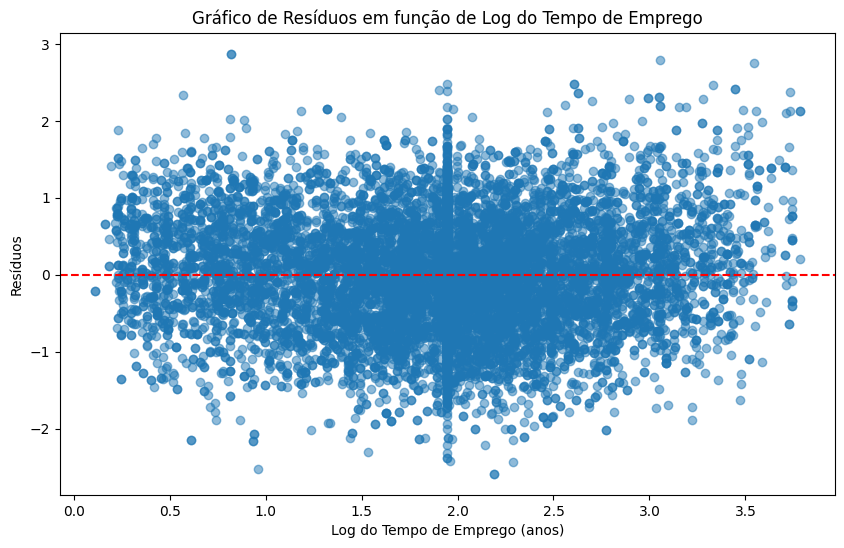

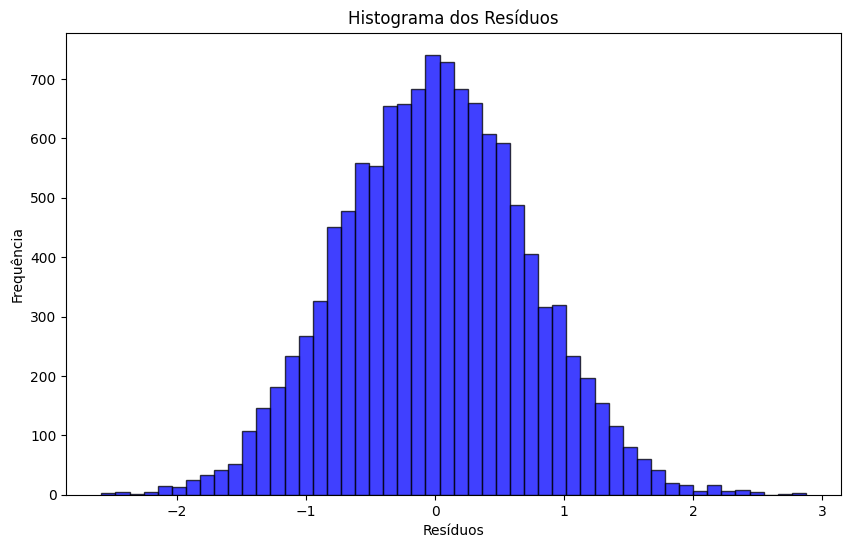

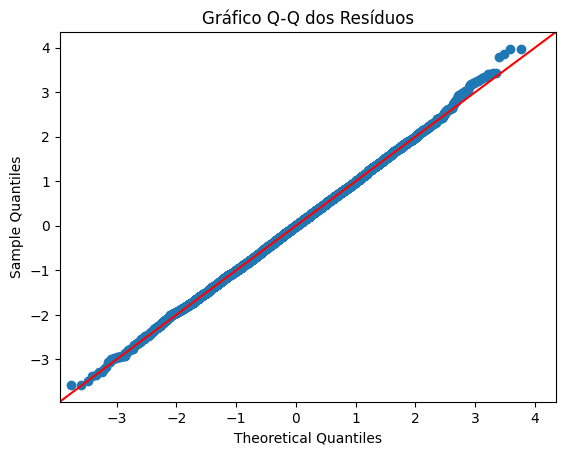

In [45]:
# Criando a coluna log_tempo_emprego no DataFrame de treinamento
df_train['log_tempo_emprego'] = np.log1p(df_train['tempo_emprego'])

# Calculando os resíduos do modelo com log-transformação apenas em renda e tempo de emprego
residuals_log = model_log.resid

# Gráfico de resíduos em função de log_tempo_emprego
plt.figure(figsize=(10, 6))
plt.scatter(df_train['log_tempo_emprego'], residuals_log, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Log do Tempo de Emprego (anos)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de Log do Tempo de Emprego')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuals_log, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

# Gráfico Q-Q dos resíduos
fig = sm.qqplot(residuals_log, line='45', fit=True)
plt.title('Gráfico Q-Q dos Resíduos')
plt.show()



Gráfico de Resíduos vs Log do Tempo de Emprego: Os resíduos ainda não parecem ser distribuídos uniformemente em torno da linha zero, o que sugere que o modelo pode ser aprimorado.

Histograma dos Resíduos: O histograma mostra que a distribuição dos resíduos não é perfeitamente simétrica, indicando que a normalidade não foi totalmente alcançada.

Gráfico Q-Q: O gráfico Q-Q também sugere que os resíduos não seguem exatamente uma distribuição normal, especialmente nas caudas.